#### <span style="font-family:Papyrus; font-size:2em; color:Green">LifeCycle fo Data Scient Project </span>

**1. Defining the problem statement:**  
&nbsp;&nbsp;&nbsp; Hypothesisi Generation  
&nbsp;&nbsp;&nbsp; Collecting the data     
**2. Data Exporation**  
&nbsp;&nbsp;&nbsp; Data Cleaning  
&nbsp;&nbsp;&nbsp; Imputing Missing Values  
&nbsp;&nbsp;&nbsp; Univariant Analysis   
&nbsp;&nbsp;&nbsp; Multivariant Analysis  
&nbsp;&nbsp;&nbsp; Outlier Treament  
&nbsp;&nbsp;&nbsp; Variable Transformation  
**3. Feature Engineering**  
**4. Modelling**  
**5. Testing**  
**6. Deployment**
 

![Image of Yaktocat](http://3.bp.blogspot.com/-itB7-AuweWg/UPKRV-7BZsI/AAAAAAAAADk/nwUBL3dan9Q/s1600/big_mart_20110325093847.jpg)

### 1. Defining the problem statement :    
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also,
certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales > of each product at a particular store.Using this model, BigMart will try to understand the properties of products and stores
which play a key role in increasing sales.  
  
**1.1 Collecting the data:**  
>Training data set and testing data can download from my github https://github.com/vishalbule/Practical-Data-Science 

**1.2 Hypothesisi Generation :**  
>Understanding the problem better by brainstorming possible factors that can impact the outcome.

<ins>Store Level Hypotheses :<ins>

>**City type :** Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.  
**Population Density :** Stores located in densely populated areas should have higher sales because of more demand.  
**Store Capacity :** Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place  
**Competitors :** Stores having similar establishments nearby should have less sales because of more competition.  
**Marketing :** Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.  
**Location :** Stores located within popular marketplaces should have higher sales because of better access to customers.  
**Customer Behavior :** Stores keeping the right set of products to meet the local needs of customers will have higher sales.  
**Ambiance :** Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

<ins>Product Level Hypotheses :<ins>
    
>**Brand :** Branded products should have higher sales because of higher trust in the customer.  
**Packaging :** Products with good packaging can attract customers and sell more.  
**Utility :** Daily use products should have a higher tendency to sell as compared to the specific use products.  
**Display Area :** Products which are given bigger shelves in the store are likely to catch attention first and sell more.  
**Visibility in Store :** The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.  
**Advertising :** Better advertising of products in the store will should higher sales in most cases.  
>**Promotional Offers :** Products accompanied with attractive offers and discounts will sell more.  

![Image of Yaktocat](https://drive.google.com/uc?id=1NhCfXhkigCWKbFSbmkd8GJpNiwQwOdYN)

![Image of Yaktocat](https://drive.google.com/uc?id=1dgA5o6AH8gSG1eBo1CbvfyB_KQKsaeTz)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pylab as plot
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

File_path = "/Users/vishal.bule/Desktop/ML/BigMart/"

train = pd.read_csv( File_path +"BigMart_Sales_Data_Train.csv")
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
test = pd.read_csv( File_path +"BigMart_Sales_Data_Test.csv")
test.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1


### 2. Data Exporation :  
Remember the quality of your inputs decide the quality of your output. So, once you have got your business hypothesis ready, it makes sense to spend lot of time and efforts here. With my personal estimate, data exploration, cleaning and preparation can take up to 70% of your total project time.  

**2.1 Data Cleaning:**
>Its generally a good idea to combine both train and test data sets. This will help to perform feature engineering and then divide them later again.This saves the trouble of performing the same steps twice on test and train.

In [3]:
def get_combined_data():
    
    train = pd.read_csv( File_path + "BigMart_Sales_Data_Train.csv" )
    test  = pd.read_csv( File_path + "BigMart_Sales_Data_Test.csv")
    
    # extracting and then removing the targets from the training data
    target=train['Item_Outlet_Sales']
    
    #train.drop(['Item_Outlet_Sales'],1, inplace=True)
    combined =train.append(test)   
    
    combined.reset_index(inplace=True)
    combined.drop(['index'], inplace=True, axis=1)
    print(train.shape, test.shape, combined.shape)
    return combined

In [4]:
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

combined=get_combined_data()

print (combined.info())
print ("--------------")
print (combined.shape)
print ("--------------")
print (combined.count())
print (("--------------"))
print (combined.isnull().sum())
#            or 
# print (combined.apply(lambda x: sum(x.isnull())) )
print (combined.describe())

#lets have a look at the number of unique values in each of them
combined.apply(lambda x: len(x.unique()))

((8523, 12), (5681, 11), (14204, 12))
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB
None
--------------
(14204, 12)
--------------
Item_Fat_Content             14204
Item_Identifier              14204
Item_MRP                     14204
Item_Outlet_Sales        

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
dtype: int64

Let’s explore further using the frequency of different categories in each nominal variable. I’ll exclude the ID and source variables for obvious reasons.

In [5]:
#Filter categorical variables

#categorical_columns=[]
#for x in combined.dtypes.index: 
#    if combined.dtypes[x]=='object':
#        if x!="Item_Identifier" and x!= "Outlet_Identifier" :
#           categorical_columns.append(x)
#print (categorical_columns) 

#               or 

# Filter categorical variables
categorical_columns = [x for x in combined.dtypes.index if combined.dtypes[x]=='object']
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]
print (categorical_columns)

# print the frequency of categories
for col in categorical_columns:
    print ("\n"+col+ "\n")
    print(combined[col].value_counts())
    print ("*****************************************")

['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type']

Item_Fat_Content

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
*****************************************

Item_Type

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
*****************************************

Outlet_Location_Type

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
*****************************************

Outlet_Size

Mediu

**2.2 Imputing Missing Values:**  
>Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction or classification. 
>
>We found two variables with missing values – Item_Weight and Outlet_Size.  

**Item_Weight**

In [6]:
#Determine the average weight per item:

#print (combined['Item_Weight'].isnull().sum())
group_combined = combined.groupby(['Item_Identifier'])
#print (group_combined.count())
#print (group_combined.median())
#print (group_combined.sum()) 

group_combined_mean=group_combined.mean()
group_combined_mean=group_combined_mean.reset_index()[['Item_Identifier','Item_Weight']]

group_combined_mean

def fill_weight(row):
    condition = (group_combined_mean['Item_Identifier'] == row['Item_Identifier'])
    return group_combined_mean[condition]['Item_Weight'].values[0]

def process_weight():
    global combined
    # function that fills the missing values of the Item_Weight vairable 
    combined['Item_Weight'] = combined.apply(lambda row: fill_weight(row) if np.isnan(row['Item_Weight']) else row['Item_Weight'],axis=1 ) 
    return combined

combined = process_weight()
combined.describe()
print (combined.isnull().sum())


#Determine the average weight per item: This another method to Imputing Missing Values using pivot_table

#item_avg_weight = combined.pivot_table(values='Item_Weight', index='Item_Identifier')
#Get a boolean variable specifying missing Item_Weight values
#miss_bool = combined['Item_Weight'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
#print ('Orignal #missing: %d'%sum(miss_bool))
#combined.loc[miss_bool,'Item_Weight'] = combined.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight.loc[x])

#print ('Final #missing: %d'% sum(combined['Item_Weight'].isnull()))


Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64


**Outlet_Size**

In [8]:
#impute Outlet_Size with the mode of the Outlet_Size for the particular type of outlet.
from scipy.stats import mode

miss_bool = combined['Outlet_Size'].isnull()
combined['Outlet_Size'].fillna('Small',inplace=True)

outlet_size_mode = combined.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )
outlet_size_mode

print ('\nOrignal #missing: %d'% sum(miss_bool))
combined.loc[miss_bool,'Outlet_Size'] = combined.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print (sum(combined['Outlet_Size'].isnull()))



Orignal #missing: 0
0


**2.3 Variable Transformation:**
>When we want to change the scale of a variable or standardize the values of a variable for better understanding. While this transformation is a must if you have data in different scales, this transformation does not change the shape of the variable distributio

**Item_Fat_Content**   
Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular

In [9]:
fat_content = {
"Low Fat":"LF",
"Regular":"RG",
"LF":"LF",
"reg":"RG",
"low fat":"LF"
}
combined['Item_Fat_Content'] = combined['Item_Fat_Content'].map(fat_content)
#                                  or
#combined['Item_Fat_Content'] = combined['Item_Fat_Content'].replace(fat_content,inplace=True)  
combined['Item_Fat_Content'].head(5)

0    LF
1    RG
2    LF
3    RG
4    LF
Name: Item_Fat_Content, dtype: object

In [14]:
#combined['Item_Type_Combined'] = combined['Item_Identifier'].apply(lambda x: x[0:2])
#combined['Item_Type_Combined'] = combined['Item_Identifier'].map(lambda x: x[0:2])
#combined['Item_Type_Combined']

**Item_Visibility**  
We noticed that the minimum value here is 0, which makes no practical sense. Lets consider it like missing information and impute it with mean visibility of that product

In [10]:
#group_combined = combined.groupby(['Item_Visibility','Item_Identifier'])
#group_combined_mean=group_combined.mean()
#group_combined_mean=group_combined_mean.reset_index()[['Item_Visibility','Item_Identifier']]
#group_combined_mean'''

#Determine average visibility of a product
visibility_avg = combined.pivot_table(values='Item_Visibility', index='Item_Identifier')
#Impute 0 values with mean visibility of that product:
miss_bool = (combined['Item_Visibility'] == 0)
print ('Number of 0 values initially: %d'%sum(miss_bool))

combined.loc[miss_bool,'Item_Visibility'] = combined.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])

print ('Number of 0 values after modification: %d'%sum(combined['Item_Visibility'] == 0))
combined.head(5)

Number of 0 values initially: 879
Number of 0 values after modification: 0


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,LF,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,RG,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,LF,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,RG,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store
4,LF,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


### 3. Feature Engineering :   
>Feature engineering is the science (and art) of extracting more information from existing data. You are not adding any new data here, but you are actually making the data you already have more useful.

**Item_Visibility ==> visibility_avg**  
In step 1 we hypothesized that products with higher visibility are likely to sell more we should look at the visibility of the product in that particular store as compared to the mean visibility of that product across all stores This will give some idea about how much importance was given to that product in a store as compared to other stores. We can use the ‘visibility_avg’ variable made.   

In [16]:
#Determine( another variable with means ratio
#combined['Item_Visibility_MeanRatio'] = combined.apply(lambda x: x['Item_Visibility']/visibility_avg [x['Item_Identifier']], axis=1)
#print (combined['Item_Visibility_MeanRatio'].describe())

In [17]:
#visibility_avg = combined.pivot_table(values='Item_Visibility', index='Item_Identifier')
#combined[visibility_avg['Item_Identifier']]


**Item_Type ==> Item_Type_Combined**  
Earlier we saw that the Item_Type variable has 16 categories which might prove to be very useful in analysis. So its a good idea to combine them. One way could be to manually assign a new category to each. But there’s a catch here. If you look at the Item_Identifier, i.e. the unique ID of each item, it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables

In [11]:
#Get the first two characters of ID:
combined['Item_Type_Combined'] = combined['Item_Identifier'].apply(lambda x: x[0:2])

#Rename them to more intuitive categories:
item_type={'FD':'Food',
'NC':'Non-Consumable',
 'DR':'Drinks'}
combined['Item_Type_Combined'] = combined['Item_Type_Combined'].map(item_type)
combined.head(50)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Type_Combined
0,LF,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1,Food
1,RG,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2,Drinks
2,LF,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1,Food
3,RG,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.200,1998,OUT010,Tier 3,Small,Grocery Store,Food
4,LF,NCD19,53.8614,994.7052,Household,0.009780,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,Non-Consumable
5,RG,FDP36,51.4008,556.6088,Baking Goods,0.057059,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,Food
6,RG,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1,Food
7,LF,FDP10,107.7622,4022.7636,Snack Foods,0.127470,19.000,1985,OUT027,Tier 3,Medium,Supermarket Type3,Food
8,RG,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,Small,Supermarket Type1,Food
9,RG,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,Small,Supermarket Type1,Food


**Outlet_Establishment_Year==>Outlet_Years**     
Make a new column depicting the years of operation of a store

In [15]:
#Years:
combined['Outlet_Years'] = 2013 - combined['Outlet_Establishment_Year']
combined['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

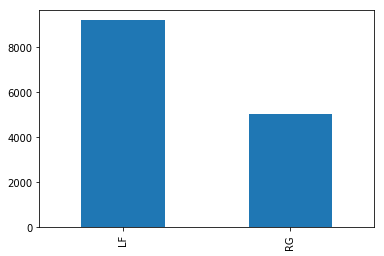

In [16]:
%matplotlib inline 
combined['Item_Fat_Content'].value_counts().sort_index().plot.bar()

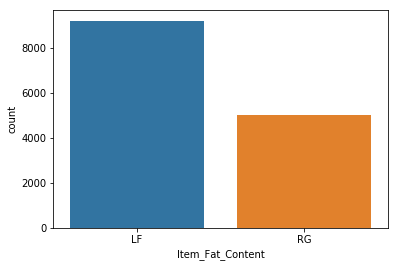

In [16]:
sns.countplot(combined['Item_Fat_Content'])

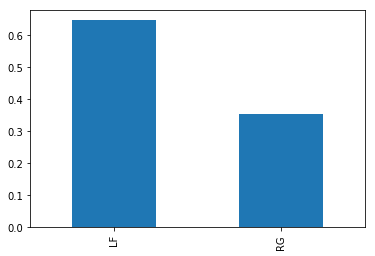

In [17]:
(combined['Item_Fat_Content'].value_counts()/len(combined['Item_Fat_Content'])).plot.bar()

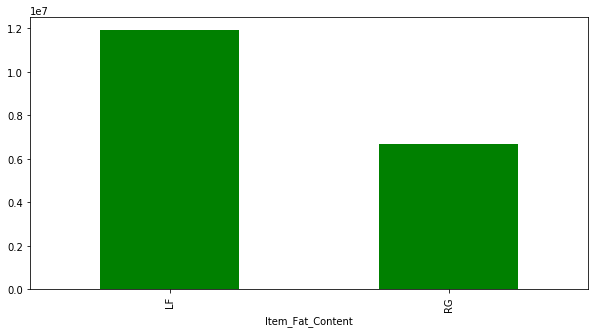

In [18]:
combined.groupby('Item_Fat_Content').agg('sum')['Item_Outlet_Sales'].plot(kind='bar',colors=['g','r'],figsize=(10, 5),stacked=True)

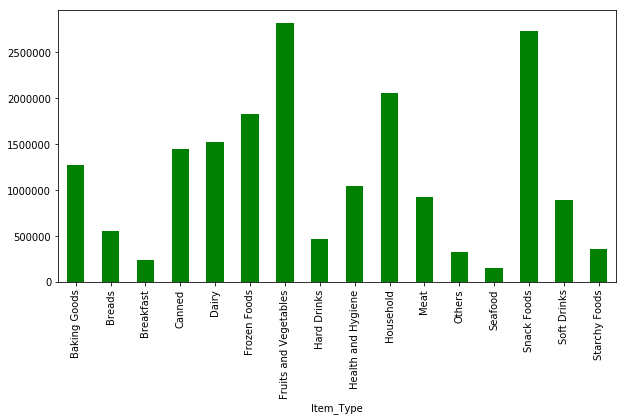

In [19]:
combined.groupby('Item_Type').agg('sum')['Item_Outlet_Sales'].plot(kind='bar',colors=['g','r'],figsize=(10, 5),stacked=True)

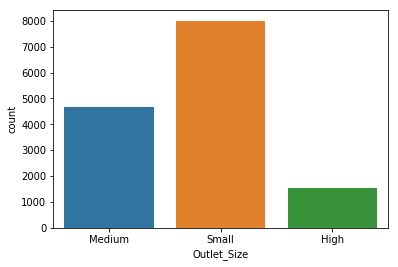

In [20]:
sns.countplot(combined['Outlet_Size'])


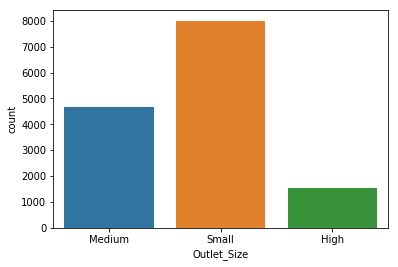

In [19]:
sns.countplot(x='Outlet_Size', data=combined)

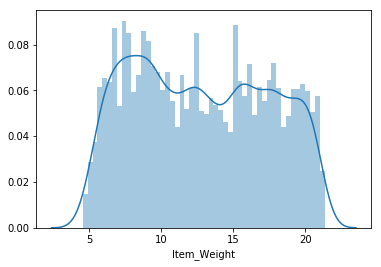

In [30]:
sns.distplot(combined["Item_Weight"],bins=50)

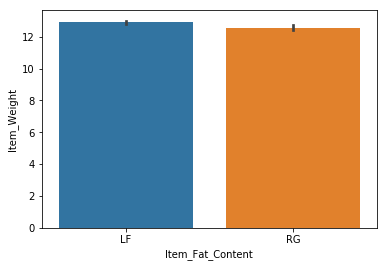

In [31]:
sns.barplot( x = "Item_Fat_Content", y = "Item_Weight" , data = combined)

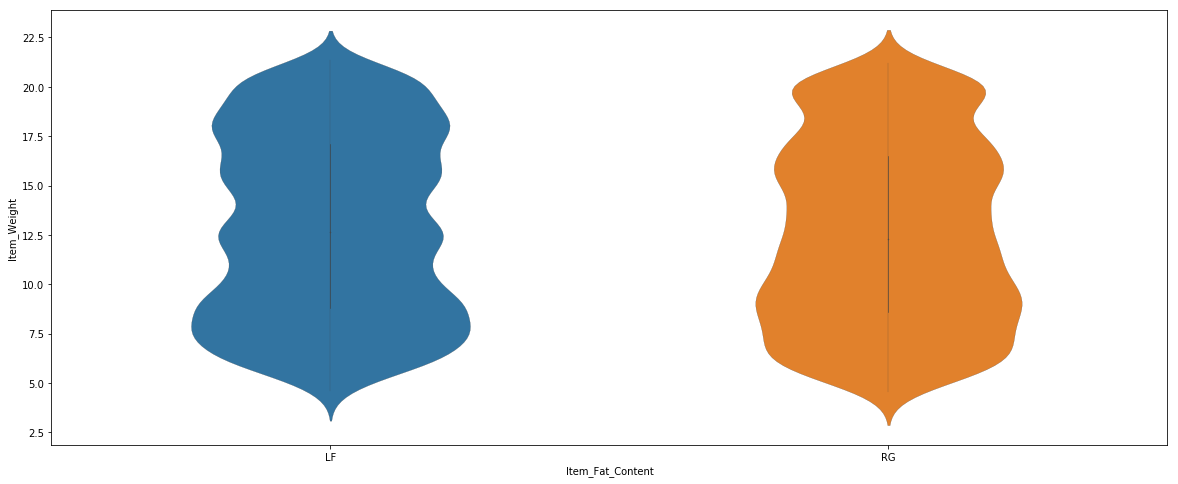

In [74]:
sns.violinplot( x = "Item_Fat_Content", y = "Item_Weight" , data = combined,linewidth=0.2,width=0.5)

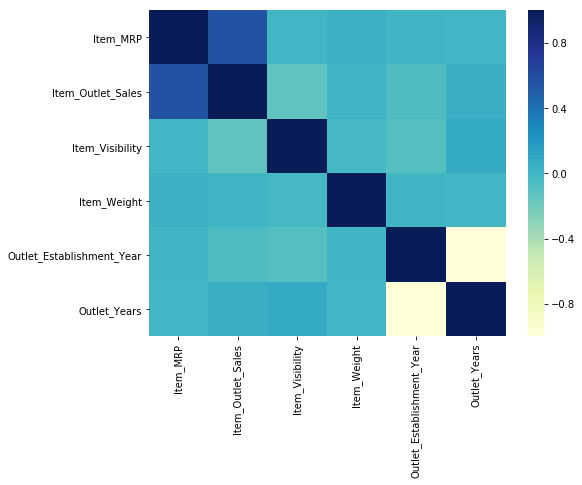

In [53]:
corr=combined.corr()
fig = plt.figure(figsize=(8, 6))
sns.heatmap(corr,
            cmap="YlGnBu",
           )

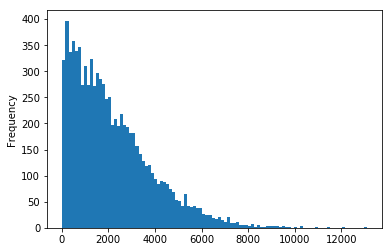

In [42]:
combined.Item_Outlet_Sales.plot(kind='hist',bins=100)

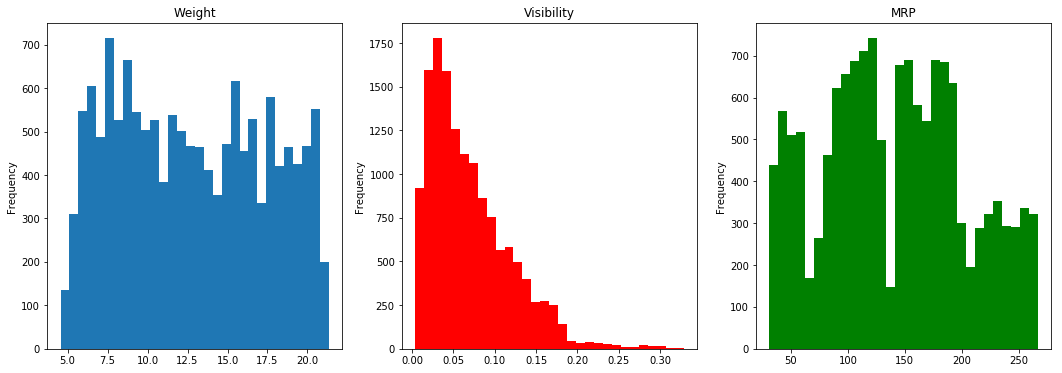

In [59]:
plt.figure(1)
plt.subplot(131)
combined.Item_Weight.plot(kind='hist',bins=30,figsize=(18,6),title='Weight')
plt.subplot(132)
combined.Item_Visibility.plot(kind='hist',bins=30,title='Visibility',color='r')
plt.subplot(133)
combined.Item_MRP.plot(kind='hist',bins=30,title='MRP',color='g')

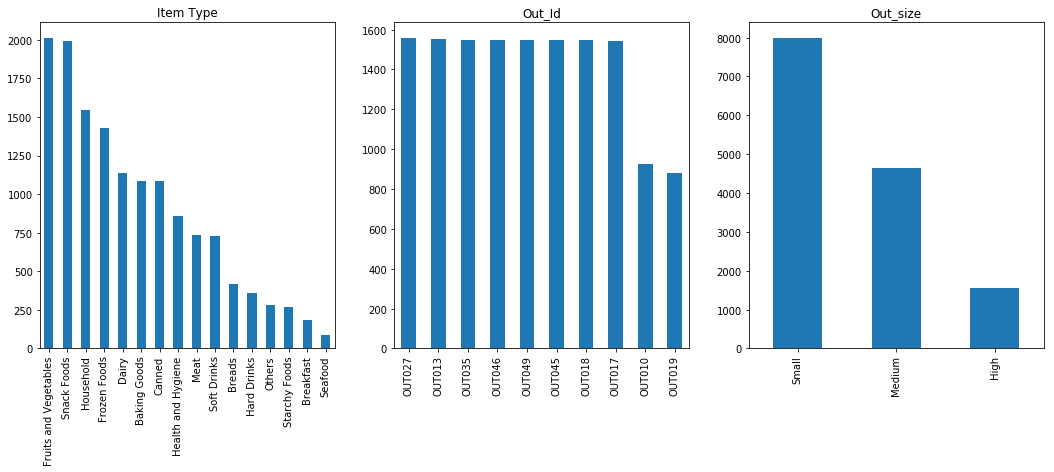

In [60]:
plt.figure(2)
plt.subplot(131)
combined.Item_Type.value_counts().plot(kind='bar',title='Item Type',figsize=(18,6))
plt.subplot(132)
combined.Outlet_Identifier.value_counts().plot(kind='bar',title='Out_Id')
plt.subplot(133)
combined.Outlet_Size.value_counts().plot(kind='bar',title='Out_size')

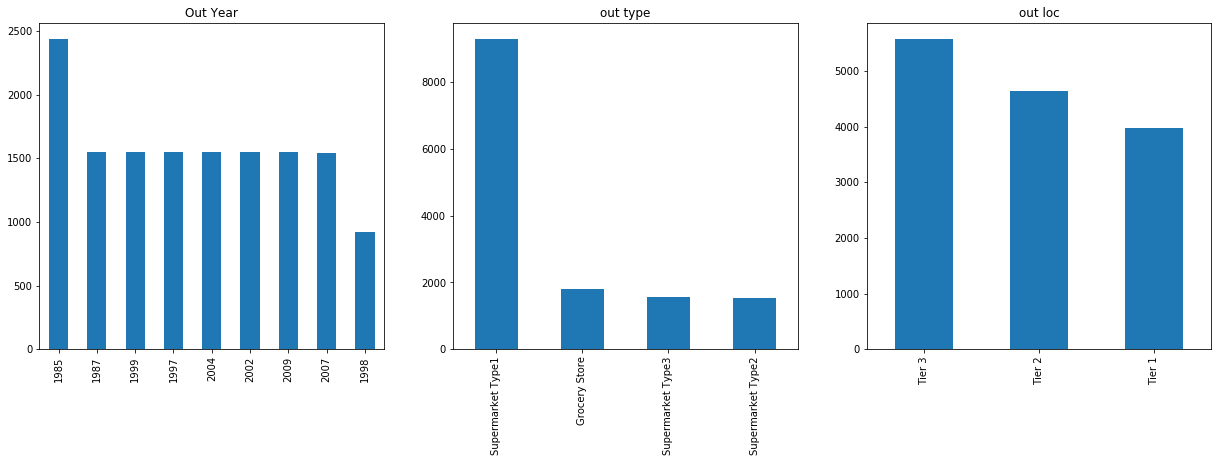

In [62]:
plt.figure(3)
plt.subplot(131)
combined.Outlet_Establishment_Year.value_counts().plot(kind='bar',title='Out Year',figsize=(21,6))
plt.subplot(132)
combined.Outlet_Type.value_counts().plot(kind='bar',title='out type')
plt.subplot(133)
combined.Outlet_Location_Type.value_counts().plot(kind='bar',title='out loc')

In [65]:
train=combined.iloc[1:train.shape[0]]
train

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Type_Combined,Outlet_Years
1,RG,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2,Drinks,4
2,LF,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1,Food,14
3,RG,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.200,1998,OUT010,Tier 3,Small,Grocery Store,Food,15
4,LF,NCD19,53.8614,994.7052,Household,0.009780,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,Non-Consumable,26
5,RG,FDP36,51.4008,556.6088,Baking Goods,0.057059,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,Food,4
6,RG,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1,Food,26
7,LF,FDP10,107.7622,4022.7636,Snack Foods,0.127470,19.000,1985,OUT027,Tier 3,Medium,Supermarket Type3,Food,28
8,RG,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,Small,Supermarket Type1,Food,11
9,RG,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,Small,Supermarket Type1,Food,6
10,LF,FDY07,45.5402,1516.0266,Fruits and Vegetables,0.040627,11.800,1999,OUT049,Tier 1,Medium,Supermarket Type1,Food,14


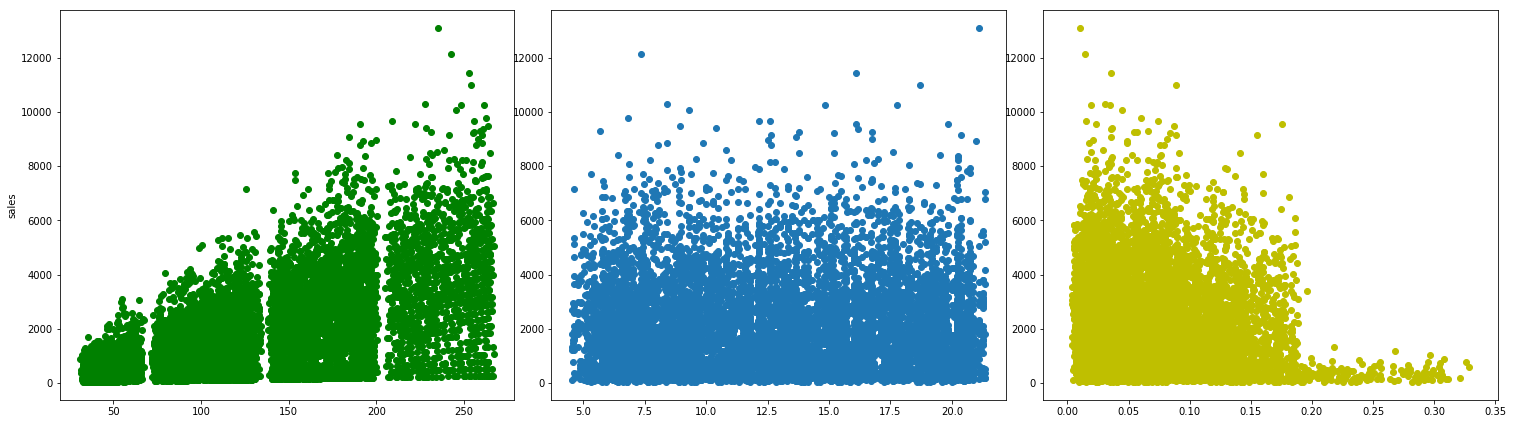

In [66]:
plt.rcParams['figure.figsize']=(21,6)
plt.subplot(131)
plt.ylabel('sales')
plt.scatter(train.Item_MRP,train.Item_Outlet_Sales,color='g')
plt.subplot(132)
plt.tight_layout()
plt.legend()
plt.scatter(train.Item_Weight,train.Item_Outlet_Sales)
plt.subplot(133)
plt.scatter(train.Item_Visibility,train.Item_Outlet_Sales,color='y')

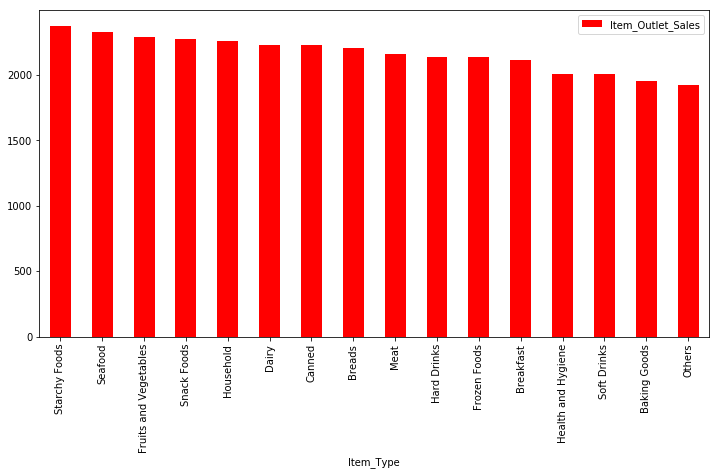

In [67]:
plt.rcParams['figure.figsize']=(12,6)
train.groupby('Item_Type')[['Item_Type','Item_Outlet_Sales']].mean().sort_values(ascending=False,by='Item_Outlet_Sales').plot(kind='bar',color='r')


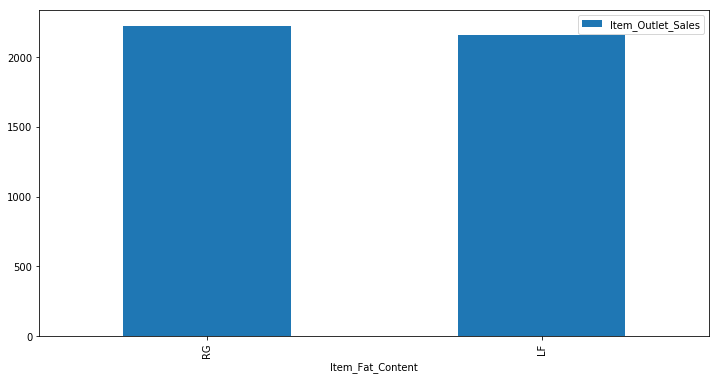

In [68]:
train.groupby('Item_Fat_Content')[['Item_Fat_Content','Item_Outlet_Sales']].mean().sort_values(ascending=False,by='Item_Outlet_Sales').plot(kind='bar')


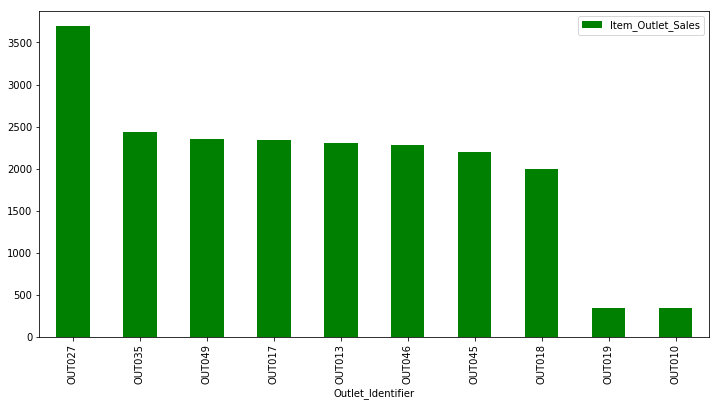

In [69]:
train.groupby('Outlet_Identifier')[['Outlet_Identifier','Item_Outlet_Sales']].mean().sort_values(ascending=False,by='Item_Outlet_Sales').plot(kind='bar',color='g')

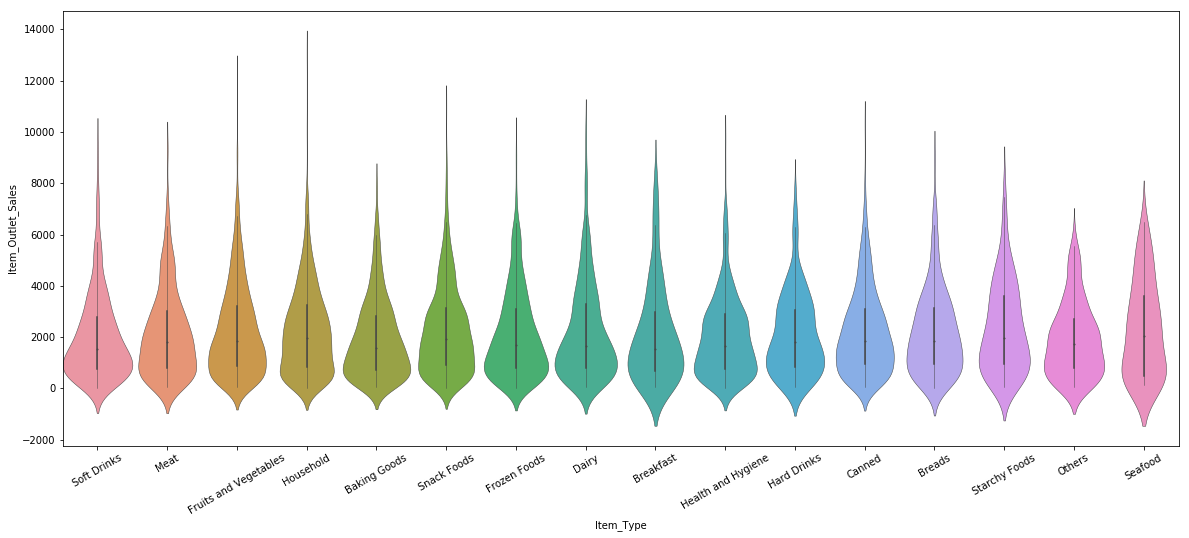

In [70]:
plt.rcParams['figure.figsize']=(20,8)
pl=sns.violinplot(x='Item_Type',y='Item_Outlet_Sales',data=train,linewidth=0.5,width=1)
_=pl.set_xticklabels(labels=train.Item_Type.unique(),rotation=30)
#train.groupby('Item_Fat_Content')[['Item_Fat_Content','Item_Outlet_Sales']].mean().sort_values(ascending=False,by='Item_Outlet_Sales').plot(kind='box')
#train.groupby('Outlet_Identifier')[['Outlet_Identifier','Item_Outlet_Sales']].mean().sort_values(ascending=False,by='Item_Outlet_Sales').plot(kind='box',color='g')